<a href="https://colab.research.google.com/github/mihika-shrivastava/garbage-detection/blob/main/using_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Garbage Detection using YOLOv5**



First we've cloned the yolov5 repository form github & installed all it's dependencies.
Then we imported PyTorch. PyTorch is an open source machine learning library based on the Torch library, used for applications such as Computer Vision and Natural Language Processing.

Here, we've used it for an application of Computer Vision- Object Detection.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


In [ ]:
!unzip -q ../garbage_detection.zip -d ../

# **Training Data**

We've used a self-created dataset for the images of garbage. 
We got the pictures from the dataset https://www.kaggle.com/asdasdasasdas/garbage-classification and then used IBM's Cloud Annotation (https://cloud.annotations.ai/) to create bounded boxes for all the images.

We have garbage sorted into six categories:
*   Cardboard
*   Paper
*   Glass
*   Metal
*   Plastic
*   Trash (includes wrappers & biodegradable waste)

For the purposes of this project, we used 589 images to train our dataset.








Here, we've trained the data. 

*custom_coco128.yaml is a modified version of the original coco128.yaml to fit our database.*

We've trained this model for 100 epochs in 16 batches.

In [ ]:
# Train YOLOv5s on modified COCO128 for 100 epochs
!python train.py --img 640 --batch 16 --epochs 100 --data custom_coco128.yaml --weights yolov5s.pt --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-209-gf527704 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/custom_coco128.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

So as we can see overall in the end, after 100 epochs, the MAP overall is 0.843
*   glass: 0.883
*   metal: 0.996
*   plastic: 0.658
*   cardboard: 0.995
*   trash: 0.771
*   paper: 0.753

# **Testing the model**
We tested tested the model on images and videos.
Since our dataset was quite small to begin with, this works best on isolated garbage items.
The results are in the result tab on the github link for this project.

With an image:

In [ ]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.35 --source ../sample1.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.35, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../sample1.jpg', update=False, view_img=False, weights=['runs/train/exp/weights/last.pt'])
YOLOv5 🚀 v5.0-209-gf527704 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7070092 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/../sample1.jpg: 480x640 1 glass, Done. (0.014s)
Results saved to runs/detect/exp13
Done. (0.024s)


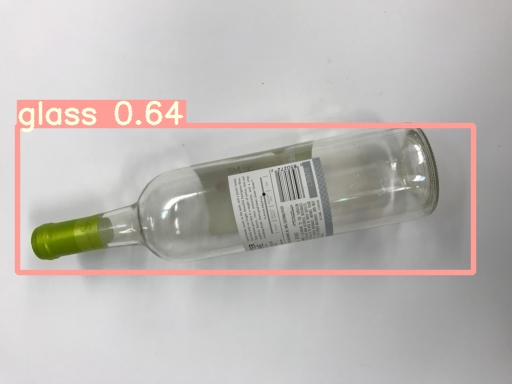

In [ ]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.35 --source ../sample2.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.35, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../sample2.mp4', update=False, view_img=False, weights=['runs/train/exp/weights/last.pt'])
YOLOv5 🚀 v5.0-209-gf527704 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7070092 parameters, 0 gradients, 16.4 GFLOPs
video 1/1 (1/161) /content/yolov5/../sample2.mp4: 352x640 1 cardboard, Done. (0.012s)
video 1/1 (2/161) /content/yolov5/../sample2.mp4: 352x640 1 cardboard, Done. (0.011s)
video 1/1 (3/161) /content/yolov5/../sample2.mp4: 352x640 1 cardboard, Done. (0.011s)
video 1/1 (4/161) /content/yolov5/../sample2.mp4: 352x640 1 cardboard, Done. (0.011s)
video 1/1 (5/161) /content/yolov5/../sample2.mp4: 352x640 1 cardboard, Done. (0.01

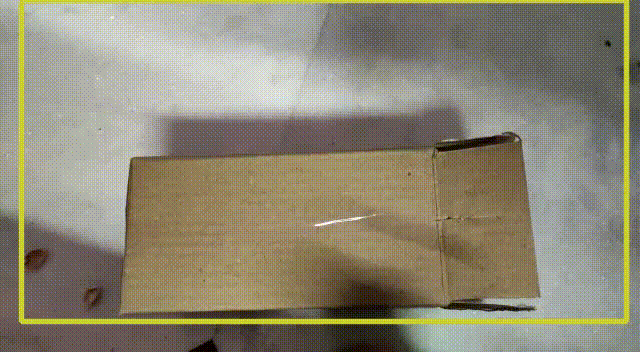